In [11]:
import numpy as np 
import pandas as pd
from plotnine import * 
import textwrap

In [6]:
# Load Dataset
songs = pd.read_csv("youtube_songs.csv")
# Inspect the first few rows
songs.head()



,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
0,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000
1,"Lady Gaga, Bruno Mars - Die With A Smile (Offi...","Lady Gaga, Bruno Mars - Die With A Smile (Offi...",MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...,1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefau...,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIay...,29600000
2,Reneé Rapp - Leave Me Alone (Official Music Vi...,Reneé Rapp - Leave Me Alone (Official Music Vi...,"Listen to “BITE ME”, the new album from Reneé ...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
3,Billie Eilish - BIRDS OF A FEATHER (Official M...,Billie Eilish - BIRDS OF A FEATHER (Official M...,Listen to HIT ME HARD AND SOFT: https://billie...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alte...,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefau...,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXo...,56800000
4,Reneé Rapp - Mad (Official Music Video),Reneé Rapp - Mad (Official Music Video),"Listen to “BITE ME”, the new album from Reneé ...",2113548,Music,Reneé Rapp;Interscope Records;Pop,180,3:00,False,https://i.ytimg.com/vi/xkWQM3flsiY/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000


In [8]:
# Data Cleaning 
# Convert view_count to numeric (if it's not already)
songs['view_count'] = pd.to_numeric(songs['view_count'], errors='coerce')

# Remove rows with missing values in view_count
songs = songs.dropna(subset=['view_count'])

In [13]:
# Top 10 Most Viewed Songs 
top_songs = songs.sort_values(by='view_count', ascending=False).head(10)

# Wrap long titles for readability (like str_wrap in R)
top_songs['wrapped_title'] = top_songs['title'].apply(lambda x: "\n".join(textwrap.wrap(x, width=30)))

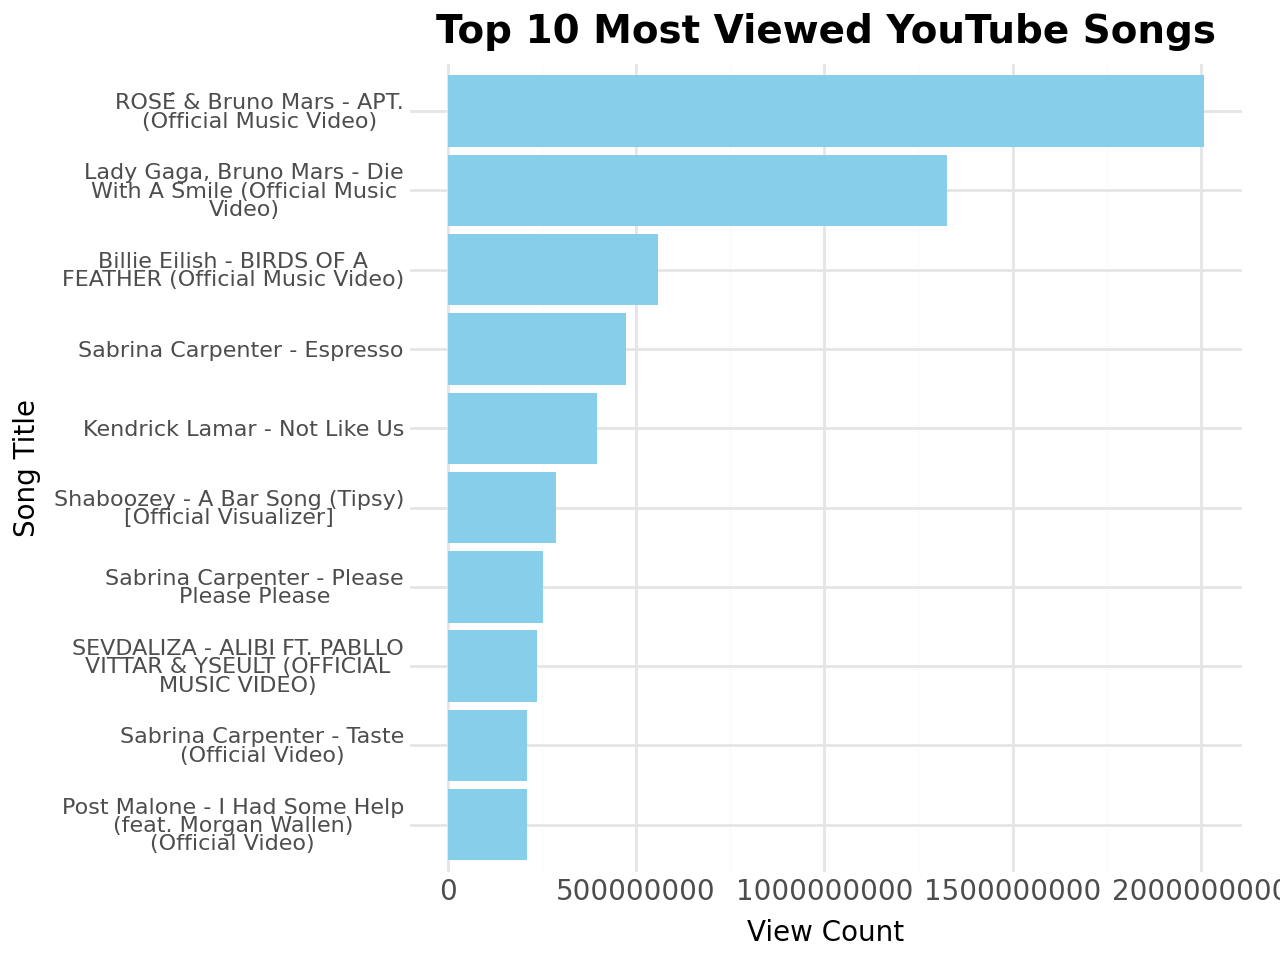

In [14]:
# Top 10 Most Viewed Songs 
(
    ggplot(top_songs, aes(x='reorder(wrapped_title, view_count)', y='view_count')) +
    geom_bar(stat='identity', fill='skyblue') +
    coord_flip() +
    labs(title='Top 10 Most Viewed YouTube Songs',
         x='Song Title',
         y='View Count') +
    theme_minimal() +
    theme(
        text=element_text(size=10),
        plot_title=element_text(size=14, weight='bold'),
        axis_text_y=element_text(size=8)
    )
)